#Introduction #  
  The Problem statement is to predict the net hourly energy of the plant (PE) using the data collected over six years(2006-2011)  from a combined cycle power plant. The data consists of  continuous variables of hourly avaerage ambinet Temperature(T)Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V).
  The most sutiable alogrthim for this task is regression because regression algorithms are used to predict a continuous value from a set of input variables. In this task, the output variable to predict is the net hourly electrical energy output and  the input variables are the ambient temperature,ambient pressure, relative humidity, and exhaust vacuum.

In [1]:
import pandas as pd # Importing the pandas library for data manipulation and analysis.
import numpy as np  # Importing the NumPy library for numerical computations.
import matplotlib.pyplot as plt  # Importing the Matplotlib library for data visualization.
from sklearn.model_selection import train_test_split    # Importing train_test_split for splitting the dataset into training and testing sets.
from sklearn import metrics                         # Importing the metrics module for evaluating the performance .
from sklearn.dummy import DummyRegressor           # Importing the KNeighborsRegressor model from the scikit-learn library as a baseline model .
from sklearn.neighbors import KNeighborsRegressor  # Importing the KNeighborsRegressor model from the scikit-learn library for regression task .
from sklearn.tree import DecisionTreeRegressor     # Importing the DecisionTreeRegressor model from the scikit-learn library for regression task..
from sklearn.model_selection import GridSearchCV   # Importing GridSearchCV for hyperparameter tuning.
import seaborn as sns                              # Importing from seaborn  for  data visualization.
from sklearn.metrics import mean_absolute_error # Importing from Sklearn  for  for calculating the mean absolute error.

In [2]:
#using google collab 
from google.colab import files  # Importing the files module from google.colab for uploading files in Google Colab
uploaded = files.upload()  # Uploading files from the local machine to the Google Colab environment

Saving course_work.csv to course_work (1).csv


In [3]:
df = pd.read_csv("course_work.csv")  # Reading the CSV file "course_work.csv" and storing the data in the DataFrame 'df'
X = df[['AT', 'V', 'AP', 'RH']]  # Creating the feature matrix 'X' by selecting columns 'AT', 'V', 'AP', 'RH' from 'df'
Y = df[['PE']]  # Creating the target variable matrix 'Y' by selecting the 'PE' column from 'df'
df.head()  # Displaying the first few rows of the DataFrame 'df'

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


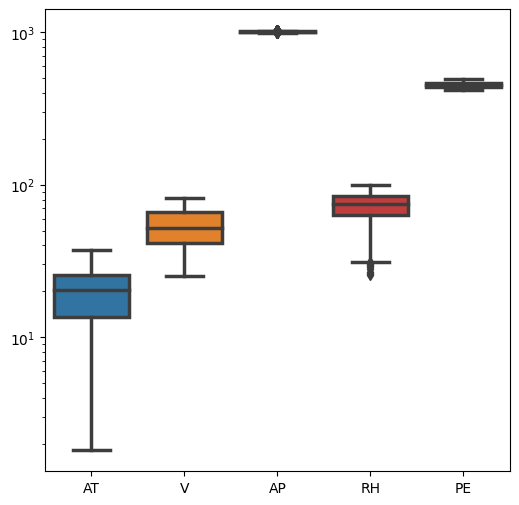

In [4]:
import seaborn as sns
a4_dims = (6, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

The mean absolute error (MAE) and the mean squared error (MSE) are both metrics used to evaluate the performance of regression models. The MAE is the average absolute difference between the predicted values and the actual values, while the MSE is the average squared difference between the predicted values and the actual values.

MAE is a more robust measure of error than MSE when there are outliers in the data. I chose mean absloute error (MAE ) As there are ouliers in the  (RH) of the data.

In [5]:
# Splitting the data into training and validation sets using train_test_split function
# Xtrain: training set features, Xval: validation set features
# Ytrain: training set target variable, Yval: validation set target variable
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=1)

# *Baseline* model # 
The Baseline was imported from the sklearn.dummy and it is used to asses the models performance 

In [6]:
dummy_regr = DummyRegressor(strategy="mean") # Create an instance of DummyRegressor with the mean strategy
dummy_regr.fit(Xtrain, Ytrain) # Fit the DummyRegressor using the training data
dumeval = dummy_regr.predict(Xval) # Make predictions on the validation data
dumteval = dummy_regr.predict(Xtrain) # Make predictions on the training data

meanAbErr = metrics.mean_absolute_error(Yval, dumeval) # Calculate the mean absolute error between the predicted values and the true values
meantAbErr = metrics.mean_absolute_error(Ytrain, dumteval) # Calculate the mean absolute error between the predicted values and the true values
print('Mean Absolute Error on training data:', meantAbErr) # Print the mean absolute error on training 
print('Mean Absolute Error on validaion data:', meanAbErr) # Print the mean absolute error on validation 

Mean Absolute Error on training data: 14.785288946846592
Mean Absolute Error on validaion data: 15.038167958565316


Baseline model on traing and validation data

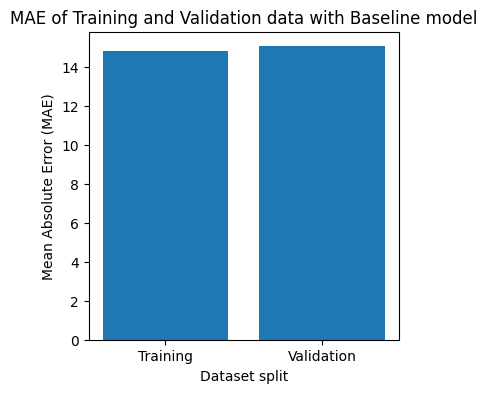

In [7]:
# Calculate the mean absolute error (MAE) for the training set
train_mae = mean_absolute_error(Ytrain, dumteval)

# Calculate the mean absolute error (MAE) for the validation set
val_mae = mean_absolute_error(Yval, dumeval)

# Plotting the MAE for training and validation sets
plt.figure(figsize=(4,4))  # Create a figure with the specified size
plt.bar(['Training', 'Validation'], [train_mae, val_mae])  # Create a bar plot
plt.xlabel('Dataset split')  # Set the label for the x-axis
plt.ylabel('Mean Absolute Error (MAE)')  # Set the label for the y-axis
plt.title('MAE of Training and Validation data with Baseline model')  # Set the title of the plot
plt.show()  # Display the plot

# Method 1 - KNeighborsRegressor #

In [8]:
knn_model = KNeighborsRegressor()  # Creating an instance of KNeighborsRegressor for the k-nearest neighbors regression model
knn_model.fit(Xtrain, Ytrain) # Fitting the KNeighborsRegressor model to the training data
knn_train_preds = knn_model.predict(Xtrain)  # Making predictions on the training  set using the trained model
knn_val_preds = knn_model.predict(Xval) # Making predictions on the validation set using the trained model
meanAbErr = metrics.mean_absolute_error(Yval, knn_val_preds) # Calculating the mean absolute error (MAE) between the actual and predicted values on the validation set 
train_mean_error = mean_absolute_error(Ytrain, knn_train_preds) # Calculating the mean absolute error (MAE) between the actual and predicted values on the training set 
print('Mean Absolute Error on training data:', train_mean_error) # Print the mean absolute error on the training data
print('Mean Absolute Error on validation data:', meanAbErr) # Print the mean absolute error on the validation data

Mean Absolute Error on training data: 2.332565978573296
Mean Absolute Error on validation data: 2.878671891327065


# Comparision of knn reression on the training and validation data #

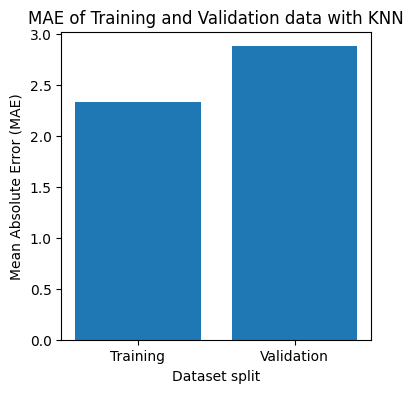

In [9]:
# Calculate the mean absolute error (MAE) for the training set
train_mae = mean_absolute_error(Ytrain, knn_train_preds)
# Calculate the mean absolute error (MAE) for the validation set
val_mae = mean_absolute_error(Yval, knn_val_preds)
# Plotting the MAE for training and validation sets
plt.figure(figsize=(4, 4))  # Create a figure with the specified size
plt.bar(['Training', 'Validation'], [train_mae, val_mae])  # Create a bar plot
plt.xlabel('Dataset split')  # Set the label for the x-axis
plt.ylabel('Mean Absolute Error (MAE)')  # Set the label for the y-axis
plt.title('MAE of Training and Validation data with KNN')  # Set the title of the plot
plt.show()  # Display the plot


#Hyperparameters for KNeighborsRegressor #
The Hyperparameters for KNN regression are 

1. n_neighbors: This hyperparameter determines the number of neighbors to consider when making predictions. It represents the K value in KNN. By default, it is set to 5.
Additionally, there are other hyperparameters that can affect the performance of KNN regression:

2. weights: This hyperparameter specifies the weight assigned to each neighbor when making predictions. It can be set to "uniform" where all neighbors are given equal weight, or "distance" where closer neighbors have a higher weight.

3. algorithm: This hyperparameter determines the algorithm used to compute the nearest neighbors. It can be set to "auto", "ball_tree", "kd_tree", or "brute". The choice of algorithm affects the computational efficiency of the KNN algorithm.

4. leaf_size: This hyperparameter is relevant when using the "ball_tree" or "kd_tree" algorithm. It determines the leaf size of the tree data structure used for efficient neighbor searching.

5.p: This hyperparameter represents the power parameter for the Minkowski distance metric. It is only relevant when using the "minkowski" distance metric and can be set to 1 (Manhattan distance) or 2 (Euclidean distance)

In [ ]:
# data frame for the hyperparameters
results_df = pd.DataFrame(columns=['n_neighbors', 'weights', 'MAE'])
# Define the ranges for different hyperparameters
n_neighbors_values = [1,2,3,4,5,6,7,8,9,10]
weights_values = ['uniform', 'distance']
# Iterate over hyperparameter choices and evaluate the model
for n_neighbors in n_neighbors_values:
    for weights in weights_values:
            # Create the KNN model with the current hyperparameters
            knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
            # Fit the model on the training data
            knn_model.fit(Xtrain, Ytrain)
            # Make predictions on the testing data
            y_pred = knn_model.predict(Xval)
            # Calculate the Mean Absolute Error (MAE)
            mae = metrics.mean_absolute_error(Yval, y_pred)
            # Append the results to the dataframe
            results_df = results_df.append({
                'n_neighbors': n_neighbors,
                'weights': weights,
                'MAE': mae
            }, ignore_index=True)

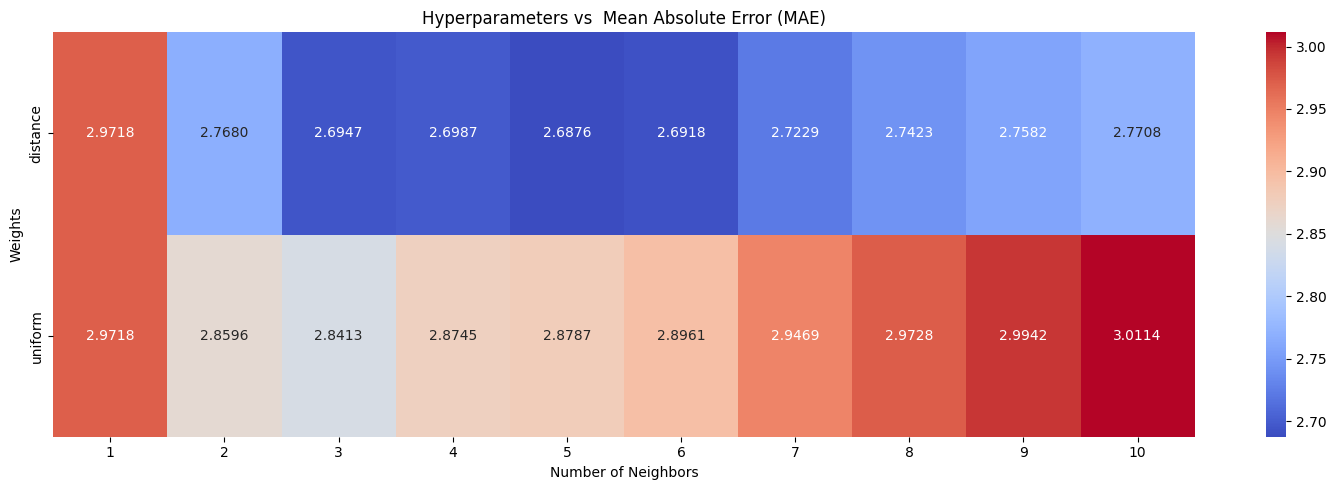

In [11]:
# Create a pivot table for the heatmap
pivot_table = results_df.pivot_table(index='weights', columns='n_neighbors', values='MAE', aggfunc=np.mean)
# Create the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.4f', cbar=True)
plt.xlabel('Number of Neighbors')
plt.ylabel('Weights')
plt.title('Hyperparameters vs  Mean Absolute Error (MAE)')
plt.tight_layout()
plt.show()

Finding the best hyperparameters for the mode using grid cv search 

In [12]:
# Define the grid of hyperparameters to search over
grid_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'leaf_size': [5, 10, 20, 30]
}

# Create an instance of GridSearchCV for tuning the K-nearest neighbors regressor
grid = GridSearchCV(KNeighborsRegressor(), grid_params, scoring='neg_mean_squared_error', verbose=1, cv=3)

# Fit the grid search model using the training data
grid.fit(Xtrain, Ytrain)


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [5, 10, 20, 30],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [13]:
# printing the best params tuned from the cv 
print(grid.best_params_)

{'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [14]:
# Create an instance of KNeighborsRegressor with the best hyperparameters found during grid search
best_knn = KNeighborsRegressor(
    n_neighbors=grid.best_params_['n_neighbors'],
    weights=grid.best_params_['weights'],
    leaf_size=grid.best_params_['leaf_size'],
    metric=grid.best_params_['metric']
)

# Fit the K-nearest neighbors model with the best hyperparameters using the training data
best_knn.fit(Xtrain, Ytrain)

# Make predictions on the training data using the best K-nearest neighbors model
best_train_pred = best_knn.predict(Xtrain)

# Make predictions on the validation data using the best K-nearest neighbors model
best_eval_preds = best_knn.predict(Xval)


In [15]:
# Calculate the mean absolute error (MAE) for the training set using the best K-nearest neighbors model
t_meanAbErr = mean_absolute_error(Ytrain, best_train_pred)
# Calculate the mean absolute error (MAE) for the validation set using the best K-nearest neighbors model
v_meanAbErr = mean_absolute_error(Yval, best_eval_preds)
# Print the mean absolute error (MAE) for the training set
print('Mean Absolute Error for training:', t_meanAbErr)
# Print the mean absolute error (MAE) for the validation set
print('Mean Absolute Error on validation:', v_meanAbErr)


Mean Absolute Error for training: 0.0
Mean Absolute Error on validation: 2.5618919190694975


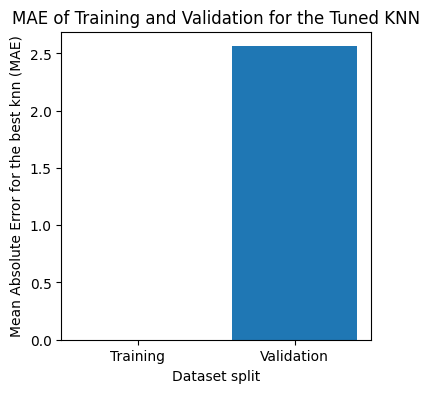

In [16]:
b_train_mae = mean_absolute_error(Ytrain, best_train_pred)
b_val_mae =  mean_absolute_error(Yval, best_eval_preds)
# Plotting the MAE for training and validation sets
plt.figure(figsize=(4, 4))
plt.bar(['Training', 'Validation'], [b_train_mae, b_val_mae])
plt.xlabel('Dataset split')
plt.ylabel('Mean Absolute Error for the best knn (MAE)')
plt.title('MAE of Training and Validation for the Tuned KNN')
plt.show()

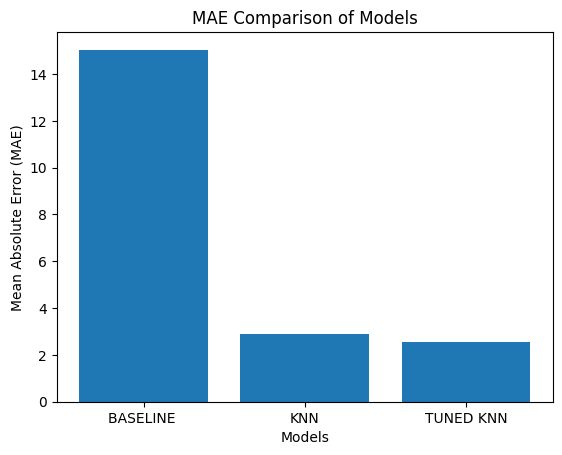

In [17]:
model1 = mean_absolute_error(Yval, dumeval)
model2 = mean_absolute_error(Yval, knn_val_preds)
model3 = mean_absolute_error(Yval, best_eval_preds)

# Define the models and their corresponding MAE values
models = ['BASELINE ', 'KNN', 'TUNED KNN']
mae_values = [model1, model2, model3]

# Plotting the MAE comparison using a grouped bar plot
plt.bar(models, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Models')
plt.show()

# Method 2 - Decision Tree 

In [18]:
# Create an instance of DecisionTreeRegressor
reg_decision_model = DecisionTreeRegressor()

# Fit the decision tree model using the training data
reg_decision_model.fit(Xtrain, Ytrain)

# Calculate the R-squared score on the training data
reg_decision_model.score(Xtrain, Ytrain)

# Make predictions on the validation data using the decision tree model
prediction_val = reg_decision_model.predict(Xval)

# Make predictions on the training data using the decision tree model
prediction_train = reg_decision_model.predict(Xtrain)

# Calculate the mean absolute error (MAE) between the predicted values and the true values for the validation data
meanAbErr = mean_absolute_error(Yval, prediction_val)

# Print the mean absolute error (MAE)
print('Mean Absolute Error:', meanAbErr)


Mean Absolute Error: 3.155935214211077


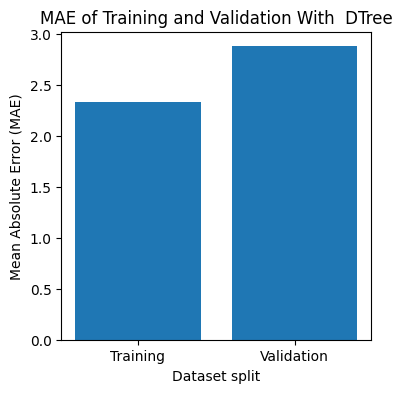

In [19]:
dt_train_mae = mean_absolute_error(Ytrain, prediction_train)
dt_val_mae =  mean_absolute_error(Yval, prediction_val)
# Plotting the MAE for training and validation sets
plt.figure(figsize=(4, 4))
plt.bar(['Training', 'Validation'], [train_mae, val_mae])
plt.xlabel('Dataset split')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE of Training and Validation With  DTree')
plt.show()

Hyperparmeters

In [20]:
# Define the grid of hyperparameters to search over
parameters = {
    'max_depth': [None, 1, 3, 5, 7, 9, 10],
    'min_samples_split': [2, 5, 7, 10,13, 15],
    'min_samples_leaf': [1, 2,3, 4, 5, 6, 7 ,8,9, 10] }

In [ ]:
results = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'MAE'])
for max_depth in parameters['max_depth']:
    for min_samples_split in parameters['min_samples_split']:
        for min_samples_leaf in parameters['min_samples_leaf']:
            # Create and train the decision tree regression model
            model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                          min_samples_leaf=min_samples_leaf)
            model.fit(Xtrain,   Ytrain)

            # Predict on the test set
            y_pred = model.predict(Xval)

            # Compute MAE
            mae = mean_absolute_error(Yval, y_pred)

            # Store the results in the DataFrame
            results = results.append({'max_depth': max_depth, 'min_samples_split': min_samples_split,
                                      'min_samples_leaf': min_samples_leaf, 'MAE': mae},
                                     ignore_index=True)

# Print the results table
print(results)

Text(0.5, 1.0, 'Parameters vs. MAE')

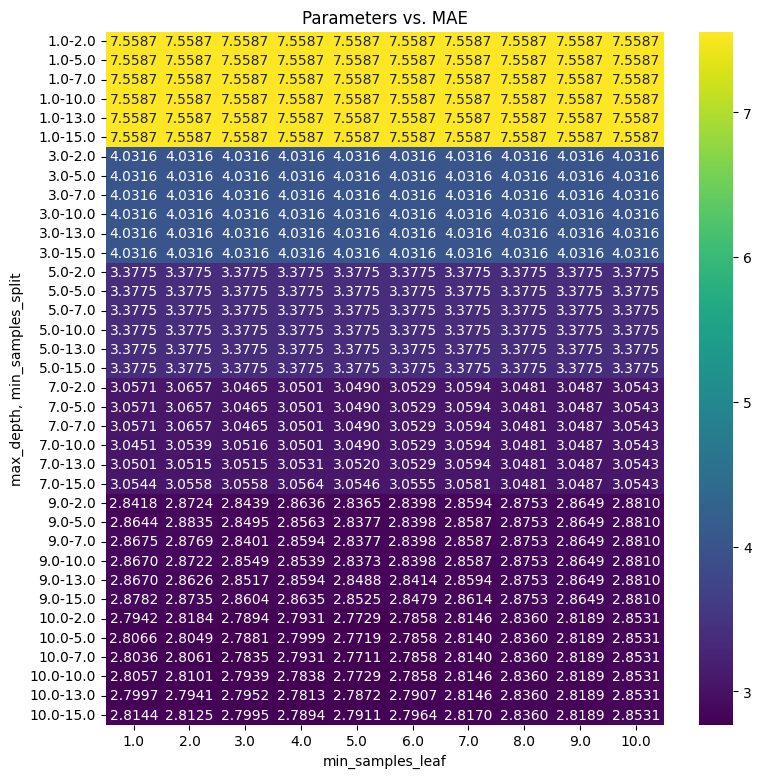

In [22]:
pivot_table = results.pivot_table(index=['max_depth', 'min_samples_split'],
                                  columns='min_samples_leaf', values='MAE')

# Plot the heatmap of parameters vs. MAE
plt.figure(figsize=(9, 9))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f', cbar=True)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth, min_samples_split')
plt.title('Parameters vs. MAE')

In [23]:
# Create an instance of GridSearchCV for tuning the regression model
tuning_model = GridSearchCV(reg_decision_model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=0)

# Fit the tuning model using the training data
tuning_model.fit(Xtrain, Ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 7, 10, 13, 15]},
             scoring='neg_mean_squared_error')

In [24]:
tuning_model.best_params_ # best parammeters from the tunned model 

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [25]:
# Create an instance of DecisionTreeRegressor with tuned hyperparameters
tuned_hyper_df_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=5)

# Fit the decision tree model with tuned hyperparameters using the training data
tuned_hyper_df_model.fit(Xtrain, Ytrain)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=5)

In [26]:
# Make predictions on the training data using the tuned decision tree model
dtt_tuned_pred_t = tuned_hyper_df_model.predict(Xtrain)
# Make predictions on the validation data using the tuned decision tree model
dtt_tuned_pred_v = tuned_hyper_df_model.predict(Xval)
# Calculate the mean absolute error (MAE) for the training set
dtt_mean_t = mean_absolute_error(Ytrain, dtt_tuned_pred_t)
# Calculate the mean absolute error (MAE) for the validation set
dtt_mean_v = mean_absolute_error(Yval, dtt_tuned_pred_v)
#Print the mean absolute error (MAE) for the training set
print('Mean Absolute Error for training:', dtt_mean_t)
# Print the mean absolute error (MAE) for the validation set
print('Mean Absolute Error on validation:', dtt_mean_v)


Mean Absolute Error for training: 2.4235631589146402
Mean Absolute Error on validation: 2.853080731630437


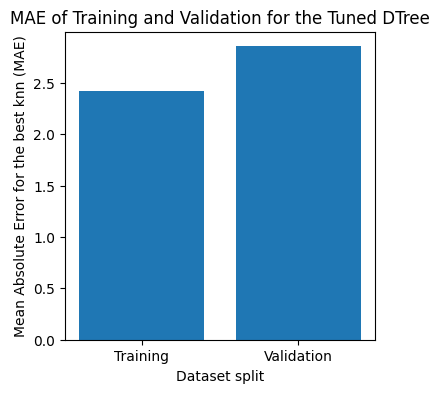

In [27]:
dtt_train_mae = mean_absolute_error(Ytrain, dtt_tuned_pred_t)
dtt_val_mae =  mean_absolute_error(Yval, dtt_tuned_pred_v)
# Plotting the MAE for training and validation sets
plt.figure(figsize=(4, 4))
plt.bar(['Training', 'Validation'], [dtt_train_mae, dtt_val_mae])
plt.xlabel('Dataset split')
plt.ylabel('Mean Absolute Error for the best knn (MAE)')
plt.title('MAE of Training and Validation for the Tuned DTree')
plt.show()

#Comparision of Decesion Tree and Baseline#

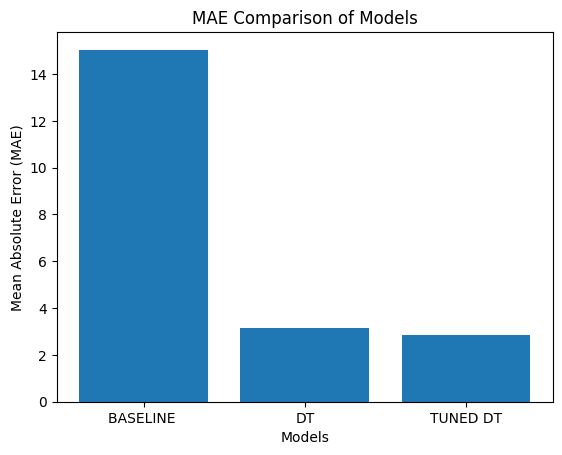

In [28]:
model1 = mean_absolute_error(Yval, dumeval)
model2 = mean_absolute_error(Yval, prediction_val)
model3 = mean_absolute_error(Yval, dtt_tuned_pred_v)

# Define the models and their corresponding MAE values
models = ['BASELINE ', 'DT', 'TUNED DT']
mae_values = [model1, model2, model3]

# Plotting the MAE comparison using a grouped bar plot
plt.bar(models, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Models')
plt.show()

#Comparision of Tuned KNN, Tuned Decesion tree and Baseline#

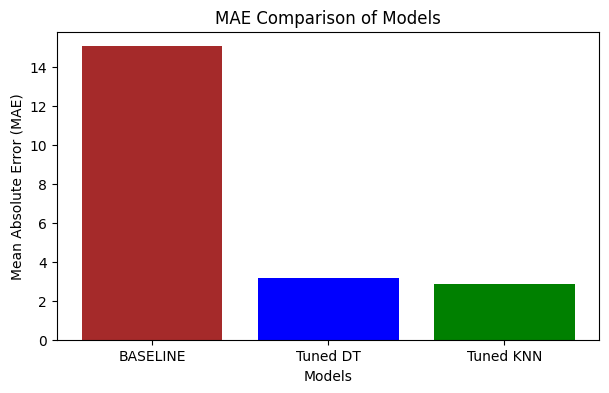

In [29]:
# Define the models and their corresponding MAE values
models = ['BASELINE', 'Tuned DT', 'Tuned KNN']
mae_values = [model1, model2, model3]

# Define colors for the bars
colors = ['brown', 'blue', 'green']
plt.figure(figsize=(7, 4))
# Plotting the MAE comparison using a grouped bar plot
plt.bar(models, mae_values, color=colors)

plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Models')

# Show the plot
plt.show()